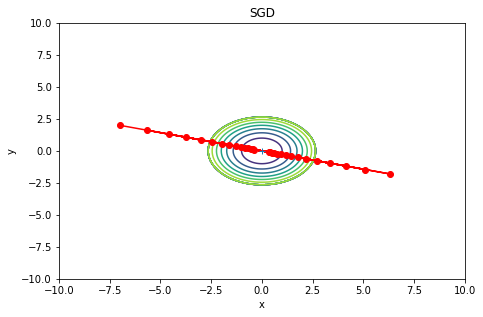

In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

def f(x, y):
    return x**2  + y**2

def df(x, y):
    return 2.0*x , 2.0*y

# def f(x, y):
#     return x**2 / 20.0 + y**2


# def df(x, y):
#     return x / 10.0, 2.0*y

# init_pos = (-2.5, 0.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
# optimizers["Momentum"] = Momentum(lr=0.1)
# optimizers["AdaGrad"] = AdaGrad(lr=1.5)
# optimizers["RMSprop"] = RMSprop(lr=0.2)
# optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.422588653931082
Momentum:2.361778260793214
AdaGrad:2.0514763036054595
Adam:2.2523695414266456
===========iteration:100===========
SGD:1.3460200000438056
Momentum:0.42906639420455456
AdaGrad:0.21511281485713712
Adam:0.35005526258173514
===========iteration:200===========
SGD:0.5617660408765137
Momentum:0.1513708723821795
AdaGrad:0.04363559212988711
Adam:0.13113298386241523
===========iteration:300===========
SGD:0.5377867594062486
Momentum:0.12998966833355327
AdaGrad:0.04732525734168646
Adam:0.08142056153753649
===========iteration:400===========
SGD:0.31550057987179303
Momentum:0.11433181567974081
AdaGrad:0.06296164045553562
Adam:0.0880215574790621
===========iteration:500===========
SGD:0.3493034847487097
Momentum:0.09929210467480201
AdaGrad:0.036176345392445644
Adam:0.042903694968709404
===========iteration:600===========
SGD:0.18962106267741285
Momentum:0.05988767349624468
AdaGrad:0.027584161762862748
Adam:0.03967526917111562
===========iterat

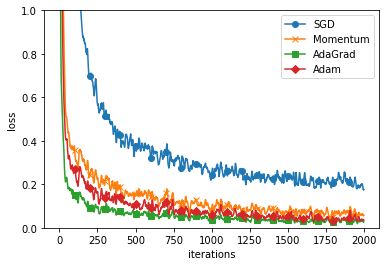

In [24]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [108]:
import numpy as np
a = np.random.randn(100000)
print(a)
print(np.mean(a))
print(np.std(a))

[-0.11235346  0.72163996 -0.51823608 ... -1.55775803  1.01509419
  0.1768747 ]
0.0015673543424861906
1.002444924523501


In [120]:
import numpy as np
a = np.random.randn(1000,1000)*0.01
print(np.mean(a))
print(np.std(a))

-6.8881307116121375e-06
0.009998139423189317


In [100]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

0.008146521606599797
0.5497505979332996


(1000, 100)


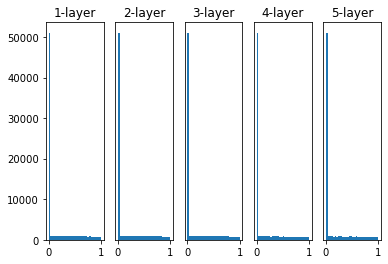

In [125]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302536623695727
Xavier:2.3017318883925872
He:2.345604622549935
===========iteration:100===========
std=0.01:2.3025306268534065
Xavier:2.262493963297798
He:1.5338690177683187
===========iteration:200===========
std=0.01:2.3026255467769503
Xavier:2.18711417809968
He:0.9021951524474481
===========iteration:300===========
std=0.01:2.3020807758990443
Xavier:1.9795253750516264
He:0.6731399975172565
===========iteration:400===========
std=0.01:2.300430667101997
Xavier:1.5062562894349012
He:0.40663918828990164
===========iteration:500===========
std=0.01:2.3011977521180764
Xavier:1.0375673930854774
He:0.4420281435779801
===========iteration:600===========
std=0.01:2.2998623407729744
Xavier:0.789163885472304
He:0.3526958043686882
===========iteration:700===========
std=0.01:2.30125753333187
Xavier:0.5602576015991405
He:0.31410017033852544
===========iteration:800===========
std=0.01:2.2994928227298876
Xavier:0.643037919450425
He:0.4359264868503462
==

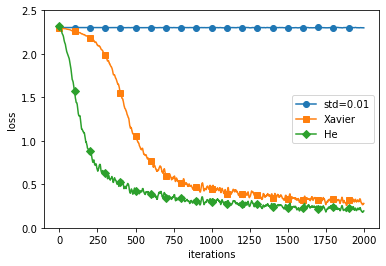

In [126]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [129]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

[1000 3000 2000 5000 7000]
[-1.2070197  -0.27854301 -0.74278135  0.64993368  1.57841037]


In [133]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))

-3.637978807091713e-17
0.9999999999999999


In [135]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 1
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

-3.637978807091713e-17
0.9999999999999999
1.0
1.9999999999999998


In [108]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.0524651895362771
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [115]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [113]:
a = np.logspace(0, 4, num=5, base=10)
a

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

============== 1/16 ==============
epoch:0 | 0.1 - 0.078
epoch:1 | 0.116 - 0.108
epoch:2 | 0.116 - 0.132
epoch:3 | 0.105 - 0.152
epoch:4 | 0.116 - 0.173
epoch:5 | 0.116 - 0.192
epoch:6 | 0.116 - 0.205
epoch:7 | 0.116 - 0.224
epoch:8 | 0.116 - 0.241
epoch:9 | 0.116 - 0.263
epoch:10 | 0.116 - 0.274
epoch:11 | 0.116 - 0.297
epoch:12 | 0.116 - 0.306
epoch:13 | 0.116 - 0.327
epoch:14 | 0.116 - 0.342
epoch:15 | 0.116 - 0.358
epoch:16 | 0.116 - 0.377
epoch:17 | 0.116 - 0.395
epoch:18 | 0.116 - 0.418


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.435
============== 2/16 ==============
epoch:0 | 0.097 - 0.086


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.136
epoch:2 | 0.097 - 0.164
epoch:3 | 0.097 - 0.185
epoch:4 | 0.097 - 0.199
epoch:5 | 0.097 - 0.227
epoch:6 | 0.097 - 0.253
epoch:7 | 0.097 - 0.273
epoch:8 | 0.097 - 0.295
epoch:9 | 0.097 - 0.324
epoch:10 | 0.097 - 0.347
epoch:11 | 0.097 - 0.364
epoch:12 | 0.097 - 0.369
epoch:13 | 0.097 - 0.379
epoch:14 | 0.097 - 0.401
epoch:15 | 0.097 - 0.423
epoch:16 | 0.097 - 0.44
epoch:17 | 0.097 - 0.465


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.466
epoch:19 | 0.097 - 0.492
============== 3/16 ==============
epoch:0 | 0.134 - 0.09
epoch:1 | 0.349 - 0.1
epoch:2 | 0.511 - 0.147
epoch:3 | 0.595 - 0.182
epoch:4 | 0.652 - 0.234
epoch:5 | 0.686 - 0.27
epoch:6 | 0.761 - 0.312
epoch:7 | 0.771 - 0.332
epoch:8 | 0.839 - 0.381
epoch:9 | 0.861 - 0.408
epoch:10 | 0.882 - 0.431
epoch:11 | 0.903 - 0.462
epoch:12 | 0.914 - 0.49
epoch:13 | 0.935 - 0.522
epoch:14 | 0.945 - 0.544
epoch:15 | 0.95 - 0.562
epoch:16 | 0.96 - 0.584
epoch:17 | 0.968 - 0.6


No handles with labels found to put in legend.


epoch:18 | 0.968 - 0.616
epoch:19 | 0.98 - 0.629
============== 4/16 ==============
epoch:0 | 0.087 - 0.073
epoch:1 | 0.245 - 0.107
epoch:2 | 0.38 - 0.209
epoch:3 | 0.47 - 0.28
epoch:4 | 0.556 - 0.345
epoch:5 | 0.604 - 0.416
epoch:6 | 0.666 - 0.48
epoch:7 | 0.711 - 0.535
epoch:8 | 0.729 - 0.586
epoch:9 | 0.758 - 0.616
epoch:10 | 0.782 - 0.645
epoch:11 | 0.79 - 0.673
epoch:12 | 0.81 - 0.699
epoch:13 | 0.813 - 0.726
epoch:14 | 0.828 - 0.741
epoch:15 | 0.836 - 0.748
epoch:16 | 0.828 - 0.768
epoch:17 | 0.838 - 0.773


No handles with labels found to put in legend.


epoch:18 | 0.846 - 0.796
epoch:19 | 0.857 - 0.798
============== 5/16 ==============
epoch:0 | 0.071 - 0.124
epoch:1 | 0.075 - 0.212
epoch:2 | 0.078 - 0.319
epoch:3 | 0.091 - 0.412
epoch:4 | 0.096 - 0.488
epoch:5 | 0.106 - 0.552
epoch:6 | 0.116 - 0.608
epoch:7 | 0.127 - 0.65
epoch:8 | 0.143 - 0.698
epoch:9 | 0.169 - 0.723
epoch:10 | 0.173 - 0.755
epoch:11 | 0.186 - 0.786
epoch:12 | 0.191 - 0.803
epoch:13 | 0.194 - 0.816
epoch:14 | 0.202 - 0.83
epoch:15 | 0.211 - 0.837
epoch:16 | 0.217 - 0.855
epoch:17 | 0.221 - 0.865
epoch:18 | 0.228 - 0.88


No handles with labels found to put in legend.


epoch:19 | 0.239 - 0.889
============== 6/16 ==============
epoch:0 | 0.101 - 0.078
epoch:1 | 0.145 - 0.137
epoch:2 | 0.149 - 0.456
epoch:3 | 0.104 - 0.593
epoch:4 | 0.116 - 0.668
epoch:5 | 0.113 - 0.723
epoch:6 | 0.112 - 0.754
epoch:7 | 0.117 - 0.784
epoch:8 | 0.117 - 0.811
epoch:9 | 0.117 - 0.828
epoch:10 | 0.117 - 0.852
epoch:11 | 0.117 - 0.862
epoch:12 | 0.117 - 0.874
epoch:13 | 0.117 - 0.885
epoch:14 | 0.117 - 0.892
epoch:15 | 0.117 - 0.9
epoch:16 | 0.117 - 0.912
epoch:17 | 0.117 - 0.923
epoch:18 | 0.117 - 0.931


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.936
============== 7/16 ==============
epoch:0 | 0.13 - 0.097
epoch:1 | 0.117 - 0.356
epoch:2 | 0.117 - 0.657
epoch:3 | 0.117 - 0.728
epoch:4 | 0.117 - 0.776
epoch:5 | 0.117 - 0.799
epoch:6 | 0.117 - 0.842
epoch:7 | 0.117 - 0.87
epoch:8 | 0.117 - 0.895
epoch:9 | 0.117 - 0.917
epoch:10 | 0.117 - 0.932
epoch:11 | 0.117 - 0.94
epoch:12 | 0.117 - 0.949
epoch:13 | 0.117 - 0.962
epoch:14 | 0.117 - 0.968
epoch:15 | 0.117 - 0.972
epoch:16 | 0.117 - 0.977
epoch:17 | 0.117 - 0.982
epoch:18 | 0.117 - 0.983

No handles with labels found to put in legend.



epoch:19 | 0.117 - 0.983
============== 8/16 ==============
epoch:0 | 0.094 - 0.108
epoch:1 | 0.094 - 0.337
epoch:2 | 0.105 - 0.708
epoch:3 | 0.117 - 0.792
epoch:4 | 0.117 - 0.835
epoch:5 | 0.117 - 0.877
epoch:6 | 0.117 - 0.907
epoch:7 | 0.117 - 0.94
epoch:8 | 0.117 - 0.958
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 1.0

No handles with labels found to put in legend.



============== 9/16 ==============
epoch:0 | 0.097 - 0.134
epoch:1 | 0.117 - 0.562
epoch:2 | 0.117 - 0.709
epoch:3 | 0.117 - 0.781
epoch:4 | 0.116 - 0.842
epoch:5 | 0.116 - 0.876
epoch:6 | 0.116 - 0.882
epoch:7 | 0.116 - 0.903
epoch:8 | 0.116 - 0.941
epoch:9 | 0.116 - 0.965
epoch:10 | 0.116 - 0.987
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.995
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.1 - 0.141
epoch:1 | 0.117 - 0.478
epoch:2 | 0.117 - 0.642
epoch:3 | 0.117 - 0.746
epoch:4 | 0.117 - 0.739
epoch:5 | 0.117 - 0.856
epoch:6 | 0.117 - 0.883
epoch:7 | 0.117 - 0.87
epoch:8 | 0.117 - 0.785
epoch:9 | 0.117 - 0.878
epoch:10 | 0.117 - 0.897
epoch:11 | 0.117 - 0.901
epoch:12 | 0.117 - 0.9
epoch:13 | 0.117 - 0.9
epoch:14 | 0.117 - 0.902
epoch:15 | 0.117 - 0.902
epoch:16 | 0.117 - 0.901
epoch:17 | 0.117 - 0.902
epoch:18 | 0.117 - 0.902


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.902
============== 11/16 ==============
epoch:0 | 0.117 - 0.134
epoch:1 | 0.117 - 0.484
epoch:2 | 0.117 - 0.604
epoch:3 | 0.117 - 0.678
epoch:4 | 0.117 - 0.544
epoch:5 | 0.117 - 0.663
epoch:6 | 0.117 - 0.708
epoch:7 | 0.117 - 0.704
epoch:8 | 0.117 - 0.747
epoch:9 | 0.117 - 0.788
epoch:10 | 0.117 - 0.789
epoch:11 | 0.117 - 0.798
epoch:12 | 0.117 - 0.769
epoch:13 | 0.117 - 0.86
epoch:14 | 0.117 - 0.866
epoch:15 | 0.117 - 0.823
epoch:16 | 0.117 - 0.864
epoch:17 | 0.117 - 0.867
epoch:18 | 0.117 - 0.887


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.894
============== 12/16 ==============
epoch:0 | 0.1 - 0.146
epoch:1 | 0.117 - 0.164
epoch:2 | 0.117 - 0.679
epoch:3 | 0.117 - 0.698
epoch:4 | 0.117 - 0.772
epoch:5 | 0.117 - 0.853
epoch:6 | 0.117 - 0.871
epoch:7 | 0.117 - 0.881
epoch:8 | 0.117 - 0.77
epoch:9 | 0.117 - 0.873
epoch:10 | 0.117 - 0.891
epoch:11 | 0.117 - 0.872
epoch:12 | 0.117 - 0.892
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.89
epoch:15 | 0.117 - 0.889
epoch:16 | 0.117 - 0.897
epoch:17 | 0.117 - 0.897
epoch:18 | 0.117 - 0.897


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.896
============== 13/16 ==============
epoch:0 | 0.117 - 0.177
epoch:1 | 0.117 - 0.458
epoch:2 | 0.117 - 0.587
epoch:3 | 0.117 - 0.664
epoch:4 | 0.117 - 0.675
epoch:5 | 0.117 - 0.673
epoch:6 | 0.117 - 0.684
epoch:7 | 0.117 - 0.694
epoch:8 | 0.117 - 0.704
epoch:9 | 0.117 - 0.769
epoch:10 | 0.117 - 0.78
epoch:11 | 0.117 - 0.752
epoch:12 | 0.117 - 0.754
epoch:13 | 0.117 - 0.781
epoch:14 | 0.117 - 0.795
epoch:15 | 0.117 - 0.828
epoch:16 | 0.117 - 0.865
epoch:17 | 0.117 - 0.867
epoch:18 | 0.117 - 0.87
epoch:19 | 0.116 - 0.881

No handles with labels found to put in legend.



============== 14/16 ==============
epoch:0 | 0.116 - 0.179
epoch:1 | 0.117 - 0.469
epoch:2 | 0.116 - 0.578
epoch:3 | 0.116 - 0.55
epoch:4 | 0.116 - 0.579
epoch:5 | 0.116 - 0.638
epoch:6 | 0.116 - 0.626
epoch:7 | 0.116 - 0.641
epoch:8 | 0.116 - 0.677
epoch:9 | 0.116 - 0.627
epoch:10 | 0.116 - 0.676
epoch:11 | 0.116 - 0.7
epoch:12 | 0.116 - 0.699
epoch:13 | 0.116 - 0.688
epoch:14 | 0.116 - 0.704
epoch:15 | 0.116 - 0.708
epoch:16 | 0.116 - 0.707
epoch:17 | 0.116 - 0.711
epoch:18 | 0.116 - 0.705


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.707
============== 15/16 ==============
epoch:0 | 0.094 - 0.113
epoch:1 | 0.116 - 0.313
epoch:2 | 0.116 - 0.382
epoch:3 | 0.116 - 0.394
epoch:4 | 0.116 - 0.41
epoch:5 | 0.117 - 0.406
epoch:6 | 0.117 - 0.412
epoch:7 | 0.117 - 0.418
epoch:8 | 0.117 - 0.412
epoch:9 | 0.117 - 0.445
epoch:10 | 0.117 - 0.449
epoch:11 | 0.117 - 0.454
epoch:12 | 0.117 - 0.432
epoch:13 | 0.117 - 0.482
epoch:14 | 0.117 - 0.504
epoch:15 | 0.117 - 0.497
epoch:16 | 0.117 - 0.526
epoch:17 | 0.117 - 0.528


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.602
epoch:19 | 0.117 - 0.603
============== 16/16 ==============
epoch:0 | 0.094 - 0.094
epoch:1 | 0.116 - 0.199
epoch:2 | 0.116 - 0.242
epoch:3 | 0.116 - 0.094
epoch:4 | 0.116 - 0.395
epoch:5 | 0.116 - 0.403
epoch:6 | 0.116 - 0.407
epoch:7 | 0.116 - 0.409
epoch:8 | 0.117 - 0.41
epoch:9 | 0.117 - 0.403
epoch:10 | 0.116 - 0.41
epoch:11 | 0.117 - 0.504
epoch:12 | 0.117 - 0.499
epoch:13 | 0.117 - 0.488
epoch:14 | 0.116 - 0.472
epoch:15 | 0.117 - 0.494
epoch:16 | 0.117 - 0.463
epoch:17 | 0.117 - 0.452
epoch:18 | 0.117 - 0.433
epoch:19 | 0.117 - 0.431


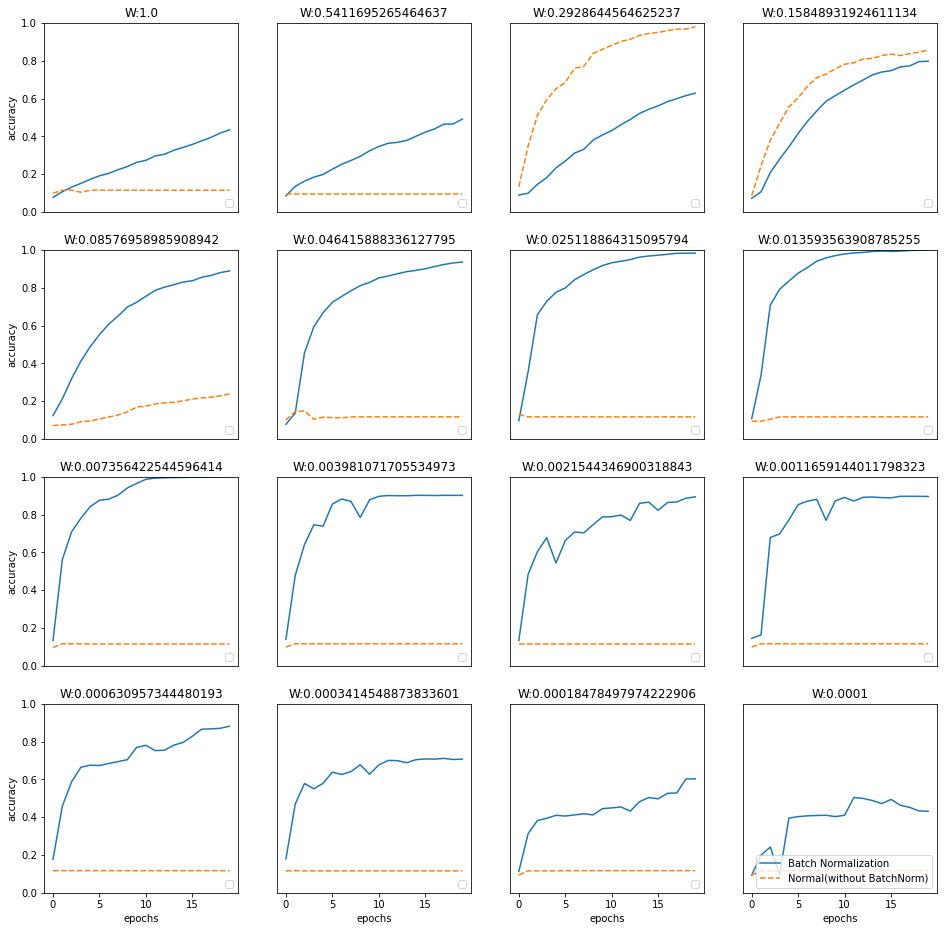

In [136]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.14666666666666667, test acc:0.1372
epoch:1, train acc:0.19666666666666666, test acc:0.1578
epoch:2, train acc:0.21666666666666667, test acc:0.1763
epoch:3, train acc:0.22666666666666666, test acc:0.1833
epoch:4, train acc:0.24333333333333335, test acc:0.1885
epoch:5, train acc:0.27, test acc:0.1983
epoch:6, train acc:0.30666666666666664, test acc:0.2192
epoch:7, train acc:0.34, test acc:0.2433
epoch:8, train acc:0.4, test acc:0.2744
epoch:9, train acc:0.42333333333333334, test acc:0.2983
epoch:10, train acc:0.44, test acc:0.3092
epoch:11, train acc:0.47333333333333333, test acc:0.3332
epoch:12, train acc:0.4866666666666667, test acc:0.3443
epoch:13, train acc:0.49, test acc:0.3523
epoch:14, train acc:0.49666666666666665, test acc:0.3616
epoch:15, train acc:0.5033333333333333, test acc:0.3669
epoch:16, train acc:0.49, test acc:0.3707
epoch:17, train acc:0.51, test acc:0.3855
epoch:18, train acc:0.5333333333333333, test acc:0.3932
epoch:19, train acc:0.55333333333333

epoch:160, train acc:0.91, test acc:0.7233
epoch:161, train acc:0.9233333333333333, test acc:0.7203
epoch:162, train acc:0.9133333333333333, test acc:0.7232
epoch:163, train acc:0.9233333333333333, test acc:0.7189
epoch:164, train acc:0.92, test acc:0.7201
epoch:165, train acc:0.9166666666666666, test acc:0.7222
epoch:166, train acc:0.9133333333333333, test acc:0.7189
epoch:167, train acc:0.9233333333333333, test acc:0.7241
epoch:168, train acc:0.9133333333333333, test acc:0.7208
epoch:169, train acc:0.9066666666666666, test acc:0.7133
epoch:170, train acc:0.9, test acc:0.721
epoch:171, train acc:0.9066666666666666, test acc:0.717
epoch:172, train acc:0.9066666666666666, test acc:0.7206
epoch:173, train acc:0.91, test acc:0.7199
epoch:174, train acc:0.91, test acc:0.7218
epoch:175, train acc:0.93, test acc:0.7257
epoch:176, train acc:0.92, test acc:0.7238
epoch:177, train acc:0.92, test acc:0.723
epoch:178, train acc:0.91, test acc:0.715
epoch:179, train acc:0.9033333333333333, test ac

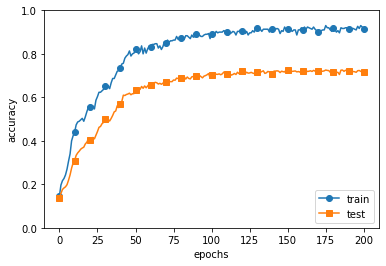

In [137]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [182]:
import numpy as np
x = (600,500)
# print(*x)
a = np.random.rand(*x)
print(np.mean(a))
print(np.max(a))
print(np.min(a))

0.49977079505884925
0.9999995851674978
2.492507856555193e-06


In [209]:
import numpy as np
x = np.arange(30).reshape((6,5))
print(x)
print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(mask.shape)
print(np.mean(mask))
print(x * mask)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
(6, 5)
[[0.55097672 0.69214061 0.62598297 0.91432499 0.0120197 ]
 [0.18597986 0.75699069 0.48765637 0.04637962 0.27768253]
 [0.64139153 0.40729769 0.92020559 0.28084663 0.5850095 ]
 [0.96627646 0.98588201 0.98310234 0.71858601 0.5637025 ]
 [0.41442132 0.54731353 0.51396852 0.41592873 0.07663009]
 [0.00875452 0.3236495  0.97039489 0.18704809 0.607137  ]]
[[ True  True  True  True False]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [False  True  True False  True]]
(6, 5)
0.8
[[ 0  1  2  3  0]
 [ 0  6  7  0  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23  0]
 [ 0 26 27  0 29]]


train loss:2.3227862460415185
=== epoch:1, train acc:0.15, test acc:0.1347 ===
train loss:2.3089540343434947
train loss:2.3112882209455337
train loss:2.2965326764347878
=== epoch:2, train acc:0.15, test acc:0.1335 ===
train loss:2.299059893058066
train loss:2.3122995802801753
train loss:2.290366597020432
=== epoch:3, train acc:0.14666666666666667, test acc:0.1349 ===
train loss:2.2942229347086216
train loss:2.3137302655542276
train loss:2.2963417079460267
=== epoch:4, train acc:0.14666666666666667, test acc:0.1376 ===
train loss:2.3093127045549213
train loss:2.2883362766434443
train loss:2.299357338323948
=== epoch:5, train acc:0.14666666666666667, test acc:0.1411 ===
train loss:2.28574997774838
train loss:2.298406680425034
train loss:2.2917441976884048
=== epoch:6, train acc:0.14666666666666667, test acc:0.142 ===
train loss:2.286895564262045
train loss:2.290543452796443
train loss:2.292859542595221
=== epoch:7, train acc:0.15, test acc:0.1441 ===
train loss:2.310007686075747
train lo

=== epoch:57, train acc:0.30666666666666664, test acc:0.2892 ===
train loss:2.230994596927721
train loss:2.2302613451345974
train loss:2.2089837170295423
=== epoch:58, train acc:0.3, test acc:0.2839 ===
train loss:2.2173920983979185
train loss:2.2282158742977654
train loss:2.1928668814513887
=== epoch:59, train acc:0.3, test acc:0.2817 ===
train loss:2.23056584844989
train loss:2.2057187879892535
train loss:2.2120679452515857
=== epoch:60, train acc:0.2966666666666667, test acc:0.2825 ===
train loss:2.2059032285236255
train loss:2.2257150798672747
train loss:2.222308362440916
=== epoch:61, train acc:0.2966666666666667, test acc:0.2809 ===
train loss:2.2236192705102895
train loss:2.209445013402226
train loss:2.2117276859469506
=== epoch:62, train acc:0.3, test acc:0.282 ===
train loss:2.2183091718222205
train loss:2.2339387901869596
train loss:2.2179635875800057
=== epoch:63, train acc:0.3, test acc:0.2845 ===
train loss:2.2210094963755065
train loss:2.2248455831663607
train loss:2.2234

=== epoch:113, train acc:0.37, test acc:0.3073 ===
train loss:2.075333863879873
train loss:2.0544151883648736
train loss:2.046716552645678
=== epoch:114, train acc:0.38, test acc:0.3095 ===
train loss:2.093383902850464
train loss:2.0430111138364913
train loss:2.096418527076294
=== epoch:115, train acc:0.37333333333333335, test acc:0.312 ===
train loss:2.0948028262506706
train loss:2.0653246874535522
train loss:2.029863619371428
=== epoch:116, train acc:0.38, test acc:0.3154 ===
train loss:2.075742302370836
train loss:2.092033593259338
train loss:2.0904569339120997
=== epoch:117, train acc:0.37666666666666665, test acc:0.3157 ===
train loss:2.0778104964400343
train loss:2.1301695168831536
train loss:2.038493865135576
=== epoch:118, train acc:0.39666666666666667, test acc:0.3235 ===
train loss:2.0243724965505425
train loss:2.0333724045064057
train loss:2.0552280586475487
=== epoch:119, train acc:0.3933333333333333, test acc:0.3248 ===
train loss:1.999254808476941
train loss:2.07156294240

=== epoch:168, train acc:0.44666666666666666, test acc:0.3617 ===
train loss:1.7361893937429287
train loss:1.7818004239918255
train loss:1.8485118087209398
=== epoch:169, train acc:0.45, test acc:0.3643 ===
train loss:1.72958750165765
train loss:1.8924536691604825
train loss:1.6999755434700086
=== epoch:170, train acc:0.4633333333333333, test acc:0.368 ===
train loss:1.8450325632513824
train loss:1.8201572711543939
train loss:1.7268896752163212
=== epoch:171, train acc:0.4666666666666667, test acc:0.3707 ===
train loss:1.725592745490128
train loss:1.7992379901743625
train loss:1.736309369065575
=== epoch:172, train acc:0.46, test acc:0.3702 ===
train loss:1.691938861176057
train loss:1.7238016942087833
train loss:1.6749367821720063
=== epoch:173, train acc:0.46, test acc:0.368 ===
train loss:1.7331985037175621
train loss:1.7776961668446405
train loss:1.7420466364011833
=== epoch:174, train acc:0.4633333333333333, test acc:0.372 ===
train loss:1.8540152225192756
train loss:1.83471595949

=== epoch:224, train acc:0.57, test acc:0.4634 ===
train loss:1.4648083929602533
train loss:1.4363224127497751
train loss:1.5335046607288731
=== epoch:225, train acc:0.5766666666666667, test acc:0.4659 ===
train loss:1.470333117151404
train loss:1.519185624180496
train loss:1.456788137559168
=== epoch:226, train acc:0.5833333333333334, test acc:0.466 ===
train loss:1.4878880718602365
train loss:1.4855400022615362
train loss:1.536938405401207
=== epoch:227, train acc:0.5766666666666667, test acc:0.465 ===
train loss:1.4529536923006625
train loss:1.5158821963584845
train loss:1.4202505022716856
=== epoch:228, train acc:0.5766666666666667, test acc:0.4665 ===
train loss:1.598558662767974
train loss:1.6707560919245303
train loss:1.5020895549637387
=== epoch:229, train acc:0.5733333333333334, test acc:0.4694 ===
train loss:1.6151216482029398
train loss:1.5471496093808788
train loss:1.4611644697884418
=== epoch:230, train acc:0.5833333333333334, test acc:0.4725 ===
train loss:1.4613603302478

=== epoch:279, train acc:0.6266666666666667, test acc:0.5228 ===
train loss:1.1430930991740755
train loss:1.1880790376342123
train loss:1.0370711761184481
=== epoch:280, train acc:0.6333333333333333, test acc:0.5247 ===
train loss:1.1529655688953633
train loss:1.2249020372951693
train loss:1.1584227547024186
=== epoch:281, train acc:0.63, test acc:0.523 ===
train loss:1.2848560606067136
train loss:1.1562411191151838
train loss:1.1597495506293216
=== epoch:282, train acc:0.63, test acc:0.526 ===
train loss:1.1893783406952627
train loss:1.17563169869415
train loss:1.1263099535671293
=== epoch:283, train acc:0.63, test acc:0.5258 ===
train loss:1.0625468081786054
train loss:1.1093768554296013
train loss:1.1558901125520895
=== epoch:284, train acc:0.6333333333333333, test acc:0.5264 ===
train loss:1.139393214735181
train loss:1.1449528322322668
train loss:1.1040168576351002
=== epoch:285, train acc:0.63, test acc:0.5294 ===
train loss:1.1233396605742585
train loss:1.0307471108336579
train 

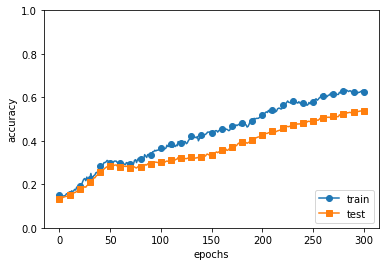

In [210]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: